In [43]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
# Importing the dataset
df = pd.read_csv("./Data/usedCleaned2021.csv")

In [44]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case

In [45]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature, target):
    
    
    
    x0 = df[target]
    #x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )

    data = [trace1]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[target]))
        print("{0} var  : ".format(target), np.var(df[target]))
        print("{0} skew : ".format(target), skew(df[target]))
        print("{0} kurt : ".format(target), kurtosis(df[target]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,target)

In [46]:
df_name = df.columns

In [47]:
df_name

Index(['Marka', 'Model', 'Godiste', 'Kilometraza', 'Karoserija', 'Gorivo',
       'Kubikaza', 'Snaga motora', 'Cena', 'EKM', 'Pogon', 'Menjac', 'Klima',
       'Boja', 'Materijal enterijera'],
      dtype='object')

In [48]:
plotBarCat(df,'Cena','Cena')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Cena mean :  5073.904454228372
Cena var  :  11905896.186593868
Cena skew :  1.5474019181947325
Cena kurt :  2.1403347699694377
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [49]:
from scipy.stats import boxcox
from scipy import stats
from scipy.stats import norm, skew
from statistics import mode
from scipy.special import boxcox1p,inv_boxcox1p
from scipy.special import inv_boxcox

mu = 5073.904454228372 and sigma = 3450.492165850262


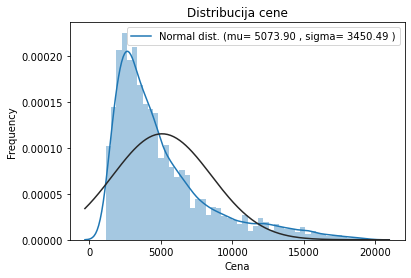

In [50]:
(mu, sigma) = norm.fit(df['Cena'])

# 1. Plot Price
sns.distplot(df['Cena'], fit=norm);
plt.ylabel('Frequency')
plt.title('Distribucija cene')
plt.legend(['Normal dist. (mu= {:.2f} , sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( 'mu = {} and sigma = {}'.format(mu, sigma))

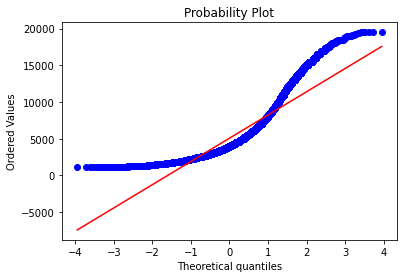

In [51]:
# Before transformation
fig = plt.figure()
res = stats.probplot(df['Cena'], plot=plt)
plt.show()

In [52]:
#applying box-cox transformation to remove skewness and converting it to normal distribution
price_box,lam_price= boxcox(df['Cena'])
df['Cena'] =price_box

mu_boxcox = 3.93 and sigma_boxcox = 0.11


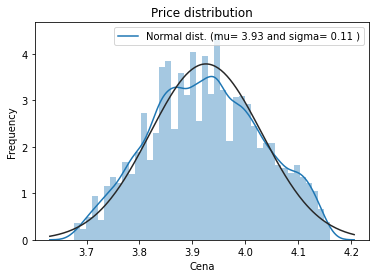

In [53]:
(mu, sigma) = norm.fit(df['Cena'])

# 1. Plot Price
sns.distplot(df['Cena'], fit=norm);
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.legend(['Normal dist. (mu= {:.2f} and sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( 'mu_boxcox = {:.2f} and sigma_boxcox = {:.2f}'.format(mu, sigma))

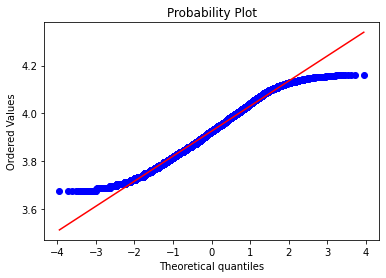

In [54]:
# After transformation
fig = plt.figure()
res = stats.probplot(df['Cena'], plot=plt)
plt.show()

In [55]:
plotBarCat(df,'Cena','Cena')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Cena mean :  3.9255038112760694
Cena var  :  0.011115991433607378
Cena skew :  0.028696990222098016
Cena kurt :  -0.6502800296364777
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [56]:
# Adding new variables
#df['prosek_god_km']=df['Kilometraza']/(2021 - df['Godiste'])
df['Starost'] = 2021 - df['Godiste']

In [57]:
df_name = df.columns

## Outliers

In [58]:
def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")

In [59]:
df_name

Index(['Marka', 'Model', 'Godiste', 'Kilometraza', 'Karoserija', 'Gorivo',
       'Kubikaza', 'Snaga motora', 'Cena', 'EKM', 'Pogon', 'Menjac', 'Klima',
       'Boja', 'Materijal enterijera', 'Starost'],
      dtype='object')

In [60]:
#OutLiersBox(df,df_name[2])

In [61]:
#OutLiersBox(df,df_name[3])

In [62]:
#OutLiersBox(df,df_name[8])

In [73]:
from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import catboost as cb
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor,  GradientBoostingRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [10]:
df = pd.get_dummies(df)

In [11]:
X =  df.drop(columns='Cena')
Y = df[df_name[8]]
X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.3,
                                                   random_state=0)

In [15]:
X

,Godiste,Kilometraza,Kubikaza,Snaga motora,Marka_Alfa Romeo,Marka_Audi,Marka_BMW,Marka_Citroen,Marka_Fiat,Marka_Ford,...,Menjac_Automatski / poluautomatski,Menjac_Automatski / poluautomatski,Menjac_Manuelni 5 brzina,Menjac_Manuelni 6 brzina,Boja_Bela,Boja_Crna,Boja_Crvena,Boja_Druga,Boja_Plava,Boja_Siva
0,2015,194000,1.5,115,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2015,176000,1.5,115,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,2017,184924,1.5,115,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,2016,185000,1.5,115,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,2015,197000,1.5,115,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13031,2004,168000,2.0,100,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
13032,2003,225000,2.0,100,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
13033,2003,315234,2.0,100,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
13034,2004,225000,2.0,100,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [16]:
Y

0        10900
1        10990
2        12300
3        13800
4        10290
         ...  
13031     2500
13032     1700
13033     1650
13034     1999
13035     1700
Name: Cena, Length: 13036, dtype: int64

In [17]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('XG'   , XGBRegressor()))
    basedModels.append(('LGBM'  , LGBMRegressor()))
    basedModels.append(('ETR'  , ExtraTreesRegressor()))
    basedModels.append(('RFR' , RandomForestRegressor()))
    basedModels.append(('ABR'   , AdaBoostRegressor()))
    basedModels.append(('GBR'  , GradientBoostingRegressor()))

    
    return basedModels

In [18]:
def BasedLine2(X_train, y_train,models, scoring):
    
    # Test options and evaluation metric
    num_folds = 10

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [19]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [20]:
models = GetBasedModel()

In [22]:
names_r,results_r = BasedLine2(X_train, y_train,models, 'neg_mean_absolute_error')

XG: -392.922777 (9.845902)
LGBM: -415.470753 (6.956907)
ETR: -365.272934 (13.320531)
RFR: -373.796893 (11.544041)
ABR: -1287.967599 (43.757637)
GBR: -547.349118 (16.916891)


In [23]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [24]:
basedLineScore = ScoreDataFrame(names_r,results_r)
basedLineScore

,Model,Score
0,XG,-392.9228
1,LGBM,-415.4708
2,ETR,-365.2729
3,RFR,-373.7969
4,ABR,-1287.9676
5,GBR,-547.3491


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'XG'  , Pipeline([('Scaler', scaler),('XG'  , XGBRegressor())])))
    pipelines.append((nameOfScaler+'LGBM' , Pipeline([('Scaler', scaler),('LGBM' , LGBMRegressor())])))
    pipelines.append((nameOfScaler+'ETR' , Pipeline([('Scaler', scaler),('ETR' , ExtraTreesRegressor())])))
    pipelines.append((nameOfScaler+'RFR', Pipeline([('Scaler', scaler),('RFR', RandomForestRegressor())])))
    #pipelines.append((nameOfScaler+'ABR'  , Pipeline([('Scaler', scaler),('ABR'  , AdaBoostRegressor())])))
    #pipelines.append((nameOfScaler+'GBR' , Pipeline([('Scaler', scaler),('GBR' , GradientBoostingRegressor())])))
    


    return pipelines 

In [26]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models, 'neg_mean_absolute_error')
PlotBoxR().PlotResult(names,results)


standardXG: -392.302362 (11.467911)
standardLGBM: -414.989761 (9.911285)
standardETR: -364.741925 (8.367983)
standardRFR: -375.334377 (6.471452)


In [27]:
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

,Model,Score,Model,Score
0,XG,-392.9228,standardXG,-392.3024
1,LGBM,-415.4708,standardLGBM,-414.9898
2,ETR,-365.2729,standardETR,-364.7419
3,RFR,-373.7969,standardRFR,-375.3344
4,ABR,-1287.9676,NaN,NaN
5,GBR,-547.3491,NaN,NaN


In [28]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models,'neg_mean_absolute_error')
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxXG: -389.887592 (14.523054)
minmaxLGBM: -414.767146 (13.066175)
minmaxETR: -367.086912 (9.846260)
minmaxRFR: -376.747627 (10.393451)


,Model,Score,Model,Score,Model,Score
0,XG,-392.9228,standardXG,-392.3024,minmaxXG,-389.8876
1,LGBM,-415.4708,standardLGBM,-414.9898,minmaxLGBM,-414.7671
2,ETR,-365.2729,standardETR,-364.7419,minmaxETR,-367.0869
3,RFR,-373.7969,standardRFR,-375.3344,minmaxRFR,-376.7476
4,ABR,-1287.9676,NaN,NaN,NaN,NaN
5,GBR,-547.3491,NaN,NaN,NaN,NaN


In [29]:
df_t = df.copy()
df_t_name = df_t.columns


In [ ]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

In [ ]:
df_t_name

In [ ]:
df_name

In [ ]:
#feature_number = 5
#OutLiersBox(df,df_name[feature_number])

In [ ]:
#feature_number = 1
#OutLiersBox(df,df_name[feature_number])

In [ ]:
"""df_t = df
feature_number = [3, 6, 7]
for fn in feature_number:
    df_clean = TurkyOutliers(df_t,df_name[fn],True)
    OutLiersBox(df_clean,df_name[fn])"""

In [51]:
"""print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df.shape[0],df_clean.shape[0],
                                                              df.shape[0]-df_clean.shape[0],
                                                        (df.shape[0]-df_clean.shape[0])/df.shape[0]*100))"""

df shape: 28545, new df shape: 28130, we lost 415 rows, 1.4538448064459626% of our data


In [52]:
#df.to_csv('./Data/usedCleaned20.csv', index=False)

In [53]:
"""df_clean_name = df_clean.columns
X_c =  df_clean.drop(columns='Cena')
Y_c = df_clean['Cena']
X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(X_c,Y_c,
                                                   test_size=0.25,
                                                   random_state=0)"""

In [54]:
"""models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_c, y_train_c,models, 'neg_mean_absolute_error')
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_c = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c], axis=1)
compareModels"""

minmaxXG: -551.080888 (13.939926)
minmaxLGBM: -568.160831 (10.896811)
minmaxETR: -550.343516 (6.941059)
minmaxRFR: -544.510706 (16.829155)
minmaxABR: -1389.471990 (39.087176)
minmaxGBR: -693.223724 (19.067966)


,Model,Score,Model,Score,Model,Score,Model,Score
0,XG,-571.9098,minmaxXG,-569.2532,minmaxXG,-569.2532,minmaxXG,-551.0809
1,LGBM,-584.2824,minmaxLGBM,-583.7781,minmaxLGBM,-583.7781,minmaxLGBM,-568.1608
2,ETR,-566.9871,minmaxETR,-566.3419,minmaxETR,-566.3419,minmaxETR,-550.3435
3,RFR,-555.4907,minmaxRFR,-555.7904,minmaxRFR,-555.7904,minmaxRFR,-544.5107
4,ABR,-1618.4653,minmaxABR,-1575.9343,minmaxABR,-1575.9343,minmaxABR,-1389.4720
5,GBR,-714.5347,minmaxGBR,-713.1584,minmaxGBR,-713.1584,minmaxGBR,-693.2237


In [42]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

#HeatMap(df,x=True)

## Algorithm tuning

In [64]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [65]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [66]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

In [67]:
X.shape[1]

NameError: name 'X' is not defined

In [74]:
from sklearn.preprocessing import OneHotEncoder
#df_enc = pd.read_csv("./Data/usedCleaned2021.csv")
df_enc = df
df_enc = pd.get_dummies(df_enc)
X =  df_enc.drop(columns=['Cena', 'Godiste'])
Y = df_enc['Cena']


X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.3,
                                                   random_state=0)


## Hyperparameters tuning

In [53]:
# model
model = XGBRegressor()

# A parameter grid for XGBoost
hyperparameters = {
        'gamma':[i/10.0 for i in range(0,5)],
        'max_depth':range(5,10,2),
        'min_child_weight':[6,8,10,12],
        'subsample':[i/100.0 for i in range(75,90,5)],
        'colsample_bytree':[i/100.0 for i in range(75,90,5)],
        'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
        }

In [54]:
#XGB_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
#Prediction_XGB = XGB_RandSearch.BestModelPridict(X_test)

Best: 0.954485 using {'subsample': 0.8, 'reg_alpha': 0.005, 'min_child_weight': 6, 'max_depth': 9, 'gamma': 0.2, 'colsample_bytree': 0.85}


In [55]:
# model
model = LGBMRegressor()
hyperparameters = {
    'n_estimators':range(200, 601,200),
    'num_leaves': [60, 80, 120, 150],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

In [56]:
#LGBM_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
#Prediction_LGBM = LGBM_RandSearch.BestModelPridict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
Best: 0.956216 using {'reg_alpha': 0.1, 'num_leaves': 60, 'n_estimators': 400, 'min_data_in_leaf': 30, 'lambda_l2': 1, 'lambda_l1': 0}


In [76]:
from sklearn.ensemble import RandomForestRegressor

def get_models():
    """Generate a library of base learners."""
    param = {'subsample': 0.95, 'reg_alpha': 0.05, 'n_estimators': 400, 'min_child_weight': 6, 'max_depth': 7, 'gamma': 0.0, 'colsample_bytree': 0.75}
    model1 = XGBRegressor(**param)

    param = {'reg_alpha': 0.1, 'num_leaves': 60, 'n_estimators': 400, 'min_data_in_leaf': 30}
    model2 = LGBMRegressor(**param)
    

    models = {'XGM':model1, 'LGBM':model2
              }

    return models

In [71]:
from sklearn.ensemble import GradientBoostingRegressor


model = GradientBoostingRegressor()

hyperparameters = {
    'n_estimators':range(500, 2001,200),
    'max_depth':range(5,18,2), 
    'min_samples_split':range(100,501,100), 
    'min_samples_leaf':range(30,101,10),
    'max_features':range(16,24,2),
    'subsample':[0.8, 0.85,0.87],
    'learning_rate': [0.001, 0.01, 0.0001]
}

#GB_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
#Prediction_GB = GB_RandSearch.BestModelPridict(X_test)
#params = {'subsample': 0.85, 'n_estimators': 900, 'min_samples_split': 200, 'min_samples_leaf': 70, 'max_features': 22, 'max_depth': 13, 'learning_rate': 0.01}

## Super Learner

In [77]:

base_learners = get_models()

"""meta_learner = GradientBoostingRegressor(
    n_estimators=1000,
    max_features=0.7,
    max_depth=13,
    subsample=0.85,
    learning_rate=0.01, 
    random_state=7
)"""

hyperparameters = {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 1000, 'depth': 8}
meta_learner = cb.CatBoostRegressor(**hyperparameters)


In [78]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=7,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values())) 
sl.add_meta(meta_learner)

# Train the ensemble
sl.fit(X_train, y_train)

# Predict the test set
p_sl = sl.predict(X_test)

[MLENS] backend: threading



Fitting 2 layers


[MLENS] Found 1 residual cache(s):
        1 (4096): C:\Users\Pc4y\AppData\Local\Temp\.mlens_tmp_cache_mr4vdq1y
        Total size: 4096
[MLENS] Removing... done.


Processing layer-1             done | 00:01:06
Processing layer-2             done | 00:00:04
Fit complete                        | 00:01:10

Predicting 2 layers
Processing layer-1             done | 00:00:02
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:03


In [79]:
#predictions = model.predict(X_test)
y_test= inv_boxcox(y_test,lam_price)
predictions = inv_boxcox(p_sl,lam_price)

MAE = (mean_absolute_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print('MAE: {:.2f}'.format(MAE))
print('R2: {:.2f}'.format(r2))

MAE: 408.32
R2: 0.97


In [90]:
# New model

In [81]:
import pickle
with open('./models/super_model.pkl', 'wb') as files:
    pickle.dump(sl, files)

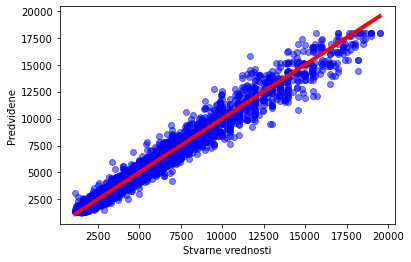

In [80]:
#Plot Real vs Predict
fig, ax = plt.subplots()
ax.scatter(y_test, predictions, color='blue', edgecolors=(0, 0, 1),alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4,color='Red')
ax.set_xlabel('Stvarne vrednosti')
ax.set_ylabel('Predviđene')
plt.show()